<center>
<img src='./summer_uni.png'  width='600'>
    
# Advanced Data Science


<center>

## Air Quality Data Set
Regression
<hr>
<br>

<center>

## Instructions

* Download the dataset file using a following link:  <a href='http://archive.ics.uci.edu/ml/datasets/Air+Quality'> DATASET.</a>

<center>


### Milestone

1. Load data using Pandas framework

2. Clean data

3. Collect feature statistics

4. Identify data labels

5. Split train set and test set

6. Rescale features and label

7. Reduce dimensionality

8. Get k-fold data

9. Identify the best model using RMSE

10. Retrain using the best model


In [1]:
# import libaries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## 1. Load data

In [2]:
# loading the data
df = pd.read_csv('AirQualityUCI.csv', sep=';')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


## 2. Clean data

In [4]:
# drop the columns Unnamed 15 and Unnamed 16 as they don't add any value to our dataset
df = df.drop(["Unnamed: 15", "Unnamed: 16"], axis= 1)

# Drop missisng values in all columns
df = df.dropna(how='all')

In [5]:
# Replace ',' with '.' to make sure floats are numerically functional 
df = df.replace(",", ".", regex=True)

# Change object columns that must be floats to numeric 
col_to_numeric = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
df[col_to_numeric] = df[col_to_numeric].apply(pd.to_numeric, errors='coerce')

# Change object colums that look like dates to real datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'],format= '%H.%M.%S').dt.time

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


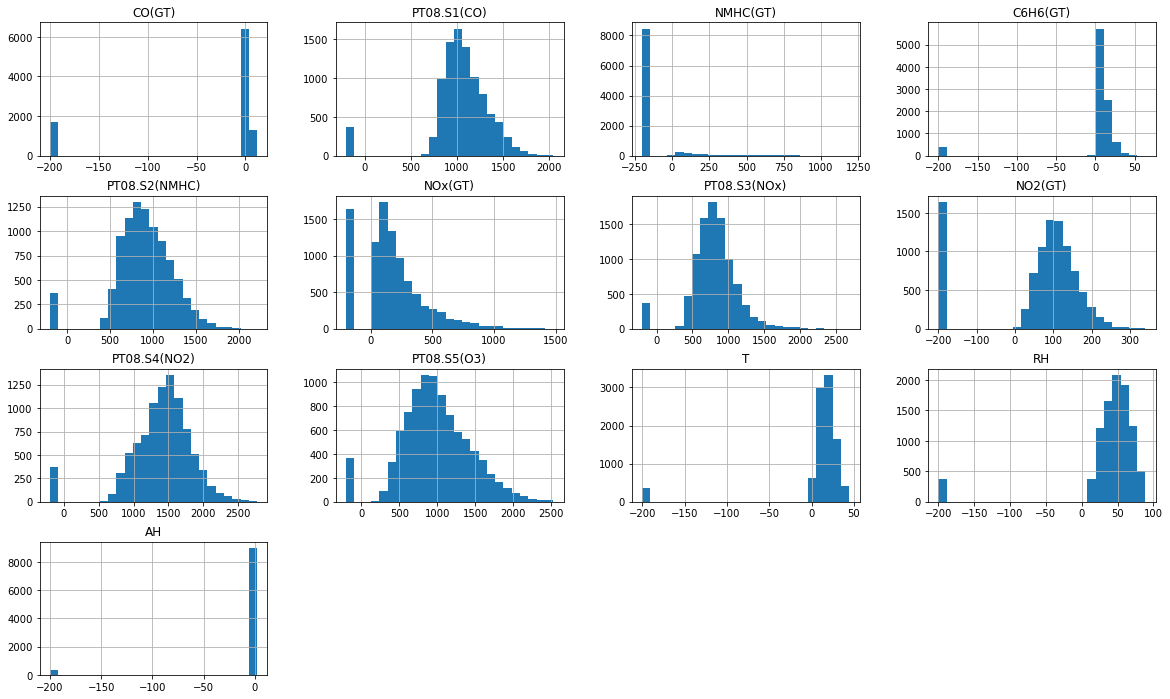

In [6]:
# Plot the numeric columns distribution to understand the skeweness of each attribute
df.drop("Date", axis =1).hist(bins=25, figsize = (20,12)); 

We can see in each histogram there is a weird bin with the value -200 on x axis. Since this value doesn't make any sense in all features, we consider it as missing value.

In [7]:
# Replace -200 with NaN
df = df.replace(-200, np.nan)

In [8]:
# Let's check the percentage of null values in each column
df.isnull().sum()/len(df) *100

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [9]:
# NMHC(GT)" has 90% of missing values, so we will drop this column.
df = df.drop("NMHC(GT)", axis=1) 

In [10]:
# It's suspicious that a lot of columns has the same number of missing values. We will  have a look at the missing values in one column.
df[df['T'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,2004-04-01,14:00:00,1.7,NaN,NaN,NaN,99.0,NaN,72.0,NaN,NaN,NaN,NaN,NaN
525,2004-04-01,15:00:00,1.9,NaN,NaN,NaN,108.0,NaN,81.0,NaN,NaN,NaN,NaN,NaN
526,2004-04-01,16:00:00,2.3,NaN,NaN,NaN,131.0,NaN,93.0,NaN,NaN,NaN,NaN,NaN
701,2004-04-08,23:00:00,2.0,NaN,NaN,NaN,129.0,NaN,106.0,NaN,NaN,NaN,NaN,NaN
702,2004-04-09,00:00:00,2.4,NaN,NaN,NaN,154.0,NaN,109.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,2005-02-11,17:00:00,6.6,NaN,NaN,NaN,1227.0,NaN,326.0,NaN,NaN,NaN,NaN,NaN
8112,2005-02-11,18:00:00,6.5,NaN,NaN,NaN,1061.0,NaN,284.0,NaN,NaN,NaN,NaN,NaN
8113,2005-02-11,19:00:00,7.1,NaN,NaN,NaN,1075.0,NaN,289.0,NaN,NaN,NaN,NaN,NaN
8114,2005-02-11,20:00:00,4.9,NaN,NaN,NaN,641.0,NaN,215.0,NaN,NaN,NaN,NaN,NaN


In [11]:
# Since some columns have the same rows with missing values, we will drop those rows
drop_rows = ["PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]
df = df.dropna(subset = drop_rows, how='all')

### Handle missing values by fitting a distribution

In [12]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

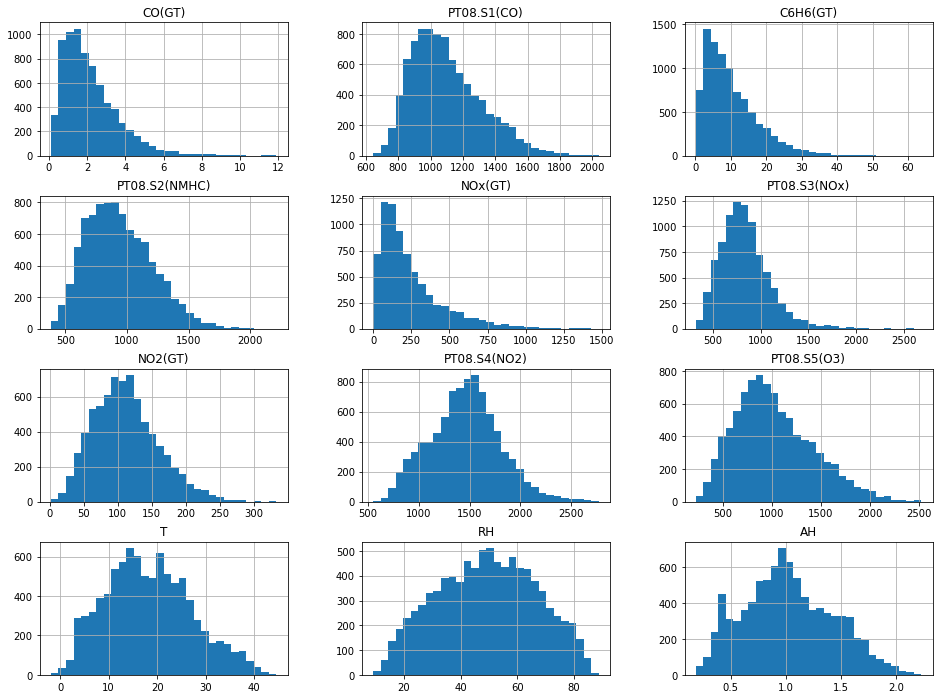

In [13]:
# Let's take a look at the distribution of each feature again
df.drop("Date", axis =1).hist(bins=30, figsize = (16,12)); 

For 3 features ("CO(GT)", "NOx(GT)", "NO2(GT)") that have more than 17% of missing value, we will fit a distribution to them and sample fitted values from the distribution, then fill missing values with fitted values.
<br> Since these 3 features have the shape of gamma distribution, we'll fit this distribution to them.

In [14]:
import scipy.stats

def get_fitted_param(col): 
    
    feature = df.loc[df[col].notnull(), col].to_numpy()  
    alpha, loc, beta = scipy.stats.gamma.fit(feature)
    
    return alpha, loc, beta

In [15]:
def get_pdf(col):

    x = np.linspace(np.min(df[col]), np.max(df[col]))
    alpha, loc, beta = get_fitted_param(col)

    pdf = scipy.stats.gamma.pdf(x ,alpha, loc=loc, scale=beta)

    return pdf

In [16]:
def plot_hist(col, pdf, bins=30):
    
    x = np.linspace(np.min(df[col]), np.max(df[col]))


    plt.figure(figsize=(10, 8))
    plt.hist(df[col], bins=bins, density=True)
    plt.title(f'{col} ' "fitted with gamma distribution")
    plt.plot(x, pdf,'r--', linewidth=3);

In [17]:
#fill missing value
def impute_nan(col):

    n_nan = len(df[df[col].isnull()])

    alpha, loc, beta = get_fitted_param(col)
    sample = scipy.stats.gamma.rvs(alpha, loc, beta, size=n_nan, random_state=42)

    df.loc[df[col].isnull(), col] = sample

### CO(GT) column

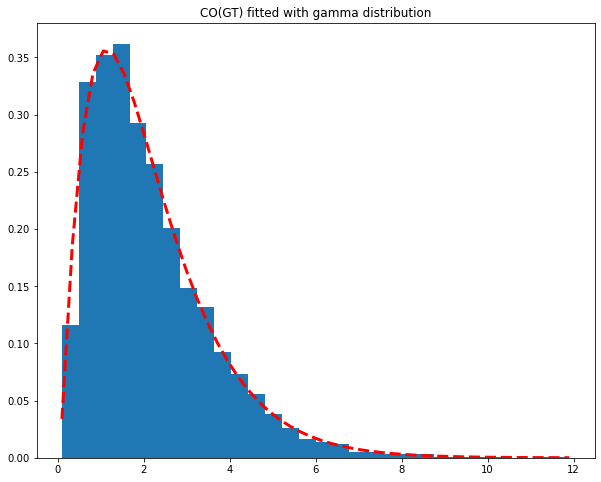

In [18]:
# Check the distribution of CO(GT) column if it fits Gamma distribution
pdf_co = get_pdf("CO(GT)")
plot_hist("CO(GT)", pdf_co)

In [19]:
# impute missing values in CO(GT) column with the fitted values from the gamma distribution
impute_nan("CO(GT)")

### NOx(GT) column

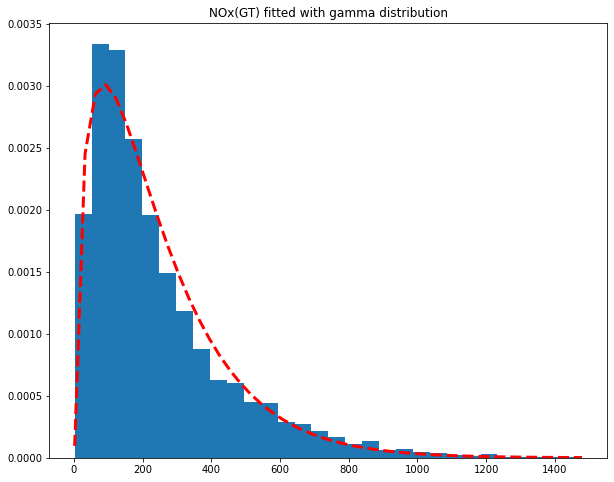

In [20]:
# Check the distribution of NOx(GT) column if it fits Gamma distribution
pdf_nox = get_pdf("NOx(GT)")
plot_hist("NOx(GT)", pdf_nox)

In [21]:
# impute missing values in NOx(GT) column with the fitted values from the gamma distribution
impute_nan("NOx(GT)")

### NO2(GT) column

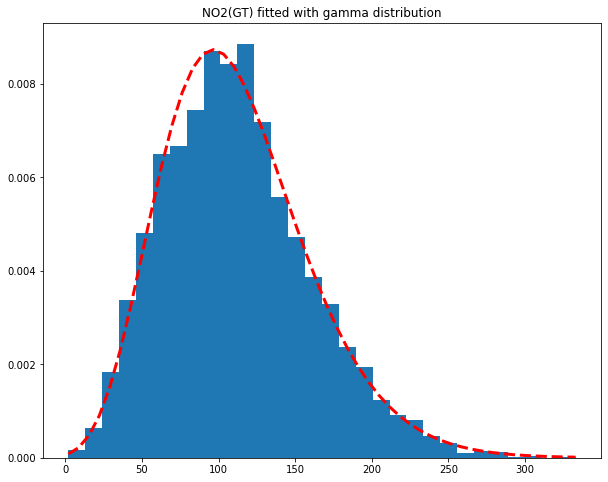

In [22]:
# Check the distribution of NO2(GT) column if it fits Gamma distribution
pdf_no2 = get_pdf("NO2(GT)")
plot_hist("NO2(GT)", pdf_no2)

In [23]:
# impute missing values in NO2(GT) column with the fitted values from the gamma distribution
impute_nan("NO2(GT)")

## 3. Get feature statistics

In [24]:
round(df.describe(), 2)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.00,8991.00,8991.00,8991.00,8991.00,8991.00,8991.00,8991.00,8991.00,8991.00,8991.00,8991.00
mean,2.14,1099.83,10.08,939.15,242.87,835.49,112.45,1456.26,1022.91,18.32,49.23,1.03
std,1.43,217.08,7.45,266.83,204.01,256.82,47.52,346.21,398.48,8.83,17.32,0.40
min,0.10,647.00,0.10,383.00,2.00,322.00,2.00,551.00,221.00,-1.90,9.20,0.18
25%,1.10,937.00,4.40,734.50,98.00,658.00,78.00,1227.00,731.50,11.80,35.80,0.74
50%,1.80,1063.00,8.20,909.00,181.00,806.00,108.98,1463.00,963.00,17.80,49.60,1.00
75%,2.80,1231.00,14.00,1116.00,322.00,969.50,140.00,1674.00,1273.50,24.40,62.50,1.31
max,13.69,2040.00,63.70,2214.00,1984.47,2683.00,376.54,2775.00,2523.00,44.60,88.70,2.23


## 4. Identify data label and features

* We choose **PT08.S1(CO)** as a label to predict. It is a numerical column, meaning our ML models will be regression.

* The label will be predicted based on 11 other features including: <br>
**CO(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH**

In [25]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [26]:
features = df.drop(["Date", "Time", "PT08.S1(CO)"], axis = 1).to_numpy()
label = df["PT08.S1(CO)"].to_numpy()

## 5. Split train set and test set 

In [27]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# split train set and test set
X_train, X_test, y_train, y_test = train_test_split(features, label, train_size=0.8)

print(f'Train shape: {X_train.shape , y_train.shape} \tTest shape: {X_test.shape, y_test.shape}' )

Train shape: ((7192, 11), (7192,)) 	Test shape: ((1799, 11), (1799,))


## 6. Rescale features and label  

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Rescale features with standard scaler
scaler = StandardScaler().fit(X_train) # apply standard scaler on train set

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [29]:
# Rescale label with min-max scaler
label_scaler = MinMaxScaler().fit(y_train.reshape(-1, 1)) # apply min-max scaler on train set

y_train = label_scaler.transform(y_train.reshape(-1, 1))
y_test = label_scaler.transform(y_test.reshape(-1, 1))

## 7. Reduce dimensionality

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None) # taking all components
pca.fit_transform(X_train)

var_ratio = pca.explained_variance_ratio_

In [31]:
def plot_cum_expained_ratio(var_ratio, threshold=0.95, figsize=(14, 6)):
    plt.figure(figsize=figsize)
    
    components = np.arange(len(var_ratio))
    ax = plt.gca()
    ax.set_title("Cumulative Explained ratio", fontsize=24)
    ax.plot(components, np.cumsum(var_ratio), 'g--', linewidth=3)
    ax.set_xticks(components)
    ax.axhline(threshold, ls='-', color='r')
    ax.grid(axis='x')

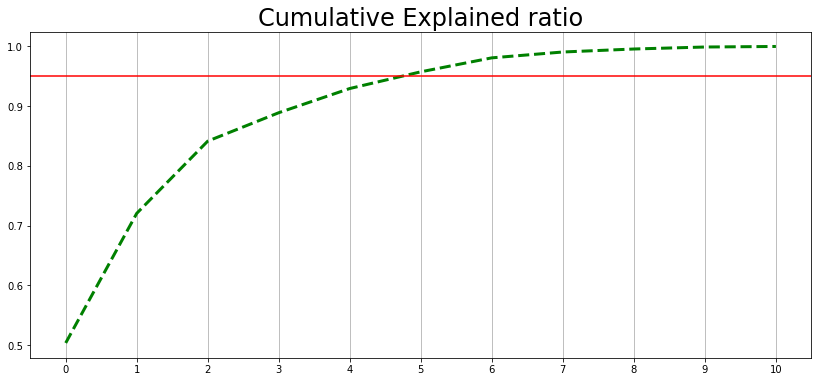

In [32]:
plot_cum_expained_ratio(var_ratio) 

In [33]:
pca = PCA(n_components=5) # identified using cum exp ratio plot with 95% threshold

X_train_proj = pca.fit_transform(X_train)
X_test_proj = pca.transform(X_test)

In [34]:
X_train_proj.shape, X_test_proj.shape , y_train.shape, y_test.shape

((7192, 5), (1799, 5), (7192, 1), (1799, 1))

We have reduced the features from 11 to 5

## 8. Get K-fold data

In [35]:
# Split train set and validation set into 10 consecutive folds

def k_fold_generator(X, y, n_splits=10, verbose=True):
        
    k_fold = KFold(n_splits=n_splits)

    for n, (tr_idx, val_idx) in enumerate(k_fold.split(X)):

        X_tr, X_val = X[tr_idx], X[val_idx]
        y_tr, y_val = y[tr_idx], y[val_idx]
        
        if verbose:
            print(f"Fold #{n+1} X_tr shape {X_tr.shape} X_val {X_val.shape} avg train idx {int(tr_idx.mean())}")
        
        yield X_tr, X_val, y_tr, y_val

In [36]:
for folds in k_fold_generator(X_train_proj, y_train, verbose=True):

    X_tr, X_val, y_tr, y_val = folds

Fold #1 X_tr shape (6472, 5) X_val (720, 5) avg train idx 3955
Fold #2 X_tr shape (6472, 5) X_val (720, 5) avg train idx 3875
Fold #3 X_tr shape (6473, 5) X_val (719, 5) avg train idx 3795
Fold #4 X_tr shape (6473, 5) X_val (719, 5) avg train idx 3715
Fold #5 X_tr shape (6473, 5) X_val (719, 5) avg train idx 3635
Fold #6 X_tr shape (6473, 5) X_val (719, 5) avg train idx 3555
Fold #7 X_tr shape (6473, 5) X_val (719, 5) avg train idx 3475
Fold #8 X_tr shape (6473, 5) X_val (719, 5) avg train idx 3395
Fold #9 X_tr shape (6473, 5) X_val (719, 5) avg train idx 3315
Fold #10 X_tr shape (6473, 5) X_val (719, 5) avg train idx 3236


## 9. Identify the best model using RMSE

Define 3 sets of parameters for KernelRidge algorithm to find the best model 

In [37]:
# Linear 
param_lineair = {'alpha': [0.1, 0.5, 1, 10]}

# Polynomial
param_polynomial = {'degree': [2, 3, 4, 5]}

# Rbf
param_rbf = {'gamma': [0.1, 0.5, 1, 10]}

In [38]:
from sklearn.kernel_ridge import KernelRidge

# Use grid search to find optimal parameter for each kernel
def best_kernel_ridge(X, y, gs_kernel, param):
    krr = KernelRidge(kernel = gs_kernel)

    grid_search = GridSearchCV(krr, param, cv = 10)

    grid_search.fit(X, y)
    best_es = grid_search.best_estimator_

    print(f"Best kernel ridge model: {best_es}")

    return best_es

### Linear kernel

In [39]:
# identify the best parameter for linear kernel
best_linear = best_kernel_ridge(X_train_proj, y_train, 'linear', param_lineair)

Best kernel ridge model: KernelRidge(alpha=10)


In [40]:
# calculate RMSE using 10-fold cross validation 
from sklearn.metrics import mean_squared_error

rmse_values= []

for folds in k_fold_generator(X_train_proj, y_train, verbose=False):

    X_tr, X_val, y_tr, y_val = folds
 
    krr_linear_best = best_linear.fit(X_tr, y_tr)
    y_hat = krr_linear_best.predict(X_val)

    rmse = mean_squared_error(y_hat, y_val, squared=False)
    rmse_values.append(rmse)
    
print(f"Avg RMSE of linear kernel: {np.mean(rmse_values): f}")

Avg RMSE of linear kernel:  0.326844


### Polynomial kernel

In [41]:
# identify the best parameter for rbf kernel
best_polynomial = best_kernel_ridge(X_train_proj, y_train, 'polynomial', param_polynomial)

Best kernel ridge model: KernelRidge(degree=4, kernel='polynomial')


In [42]:
# calculate RMSE using 10-fold cross validation 
rmse_values = []

for folds in k_fold_generator(X_train_proj, y_train, verbose=False):

    X_tr, X_val, y_tr, y_val = folds
 
    krr_polynomial_best = best_polynomial.fit(X_tr, y_tr)
    y_hat = krr_polynomial_best.predict(X_val)

    rmse = mean_squared_error(y_hat, y_val, squared=False)
    rmse_values.append(rmse)
    
print(f"Avg RMSE of polynomial kernel: {np.mean(rmse_values):f}")

Avg RMSE of polynomial kernel: 0.050233


RMSE of this model has improved a lot compared to the linear model

### Rbf kernel

In [43]:
# identify the best parameter for rbf kernel
best_rbf = best_kernel_ridge(X_train_proj, y_train, 'rbf', param_rbf)

Best kernel ridge model: KernelRidge(gamma=0.1, kernel='rbf')


In [44]:
# calculate RMSE using 10-fold cross validation 
rmse_values = []

for folds in k_fold_generator(X_train_proj, y_train, verbose = False):

    X_tr, X_val, y_tr, y_val = folds
 
    krr_rbf_best = best_rbf.fit(X_tr, y_tr)
    y_hat = krr_rbf_best.predict(X_val)

    rmse = mean_squared_error(y_hat, y_val, squared=False)
    rmse_values.append(rmse)
    
print(f"Avg RMSE of rbf kernel: {np.mean(rmse_values):f}")

Avg RMSE of rbf kernel: 0.050183


RMSE from 10-fold cross validation is slightly better than the one of polynomial model. Thus, the model with **rbf kernel** and **gamma=0.1** is the best model

## 12. Retrain using the best model

In [45]:
# fit the best model on the whole train set
rbf_model = best_rbf.fit(X_train_proj, y_train)

In [46]:
# prediction on test set
y_hat_test = rbf_model.predict(X_test_proj)

# Final model perfomance
mean_squared_error(y_hat_test, y_test, squared=False)

0.05029689366174106

## Train models without dimensionality reduction

The linear model doesn't perform very well in this case so we only do grid search on polynomial and rbf

In [47]:
# identify the best parameter for polynomial kernel
best_polynomial_no_pca = best_kernel_ridge(X_train, y_train, 'polynomial', param_polynomial)

Best kernel ridge model: KernelRidge(degree=4, kernel='polynomial')


In [48]:
rmse_values = []

for folds in k_fold_generator(X_train, y_train, verbose=False):

    X_tr, X_val, y_tr, y_val = folds
 
    polynomial_best = best_polynomial_no_pca.fit(X_tr, y_tr)
    y_hat = polynomial_best.predict(X_val)

    rmse = mean_squared_error(y_hat, y_val, squared=False)
    rmse_values.append(rmse)
    
print(f"Avg RMSE of polynomial kernel without PCA: {np.mean(rmse_values):f}")

Avg RMSE of polynomial kernel without PCA: 0.042291


In [49]:
# identify the best parameter for rbf kernel
best_rbf_no_pca = best_kernel_ridge(X_train, y_train, 'rbf', param_rbf)

Best kernel ridge model: KernelRidge(gamma=0.1, kernel='rbf')


In [50]:
# calculate RMSE using 10-fold cross validation 
rmse_values = []

for folds in k_fold_generator(X_train, y_train, verbose = False):

    X_tr, X_val, y_tr, y_val = folds
 
    rbf_best = best_rbf_no_pca.fit(X_tr, y_tr)
    y_hat = rbf_best.predict(X_val)

    rmse = mean_squared_error(y_hat, y_val, squared=False)
    rmse_values.append(rmse)
    
print(f"Avg RMSE of rbf kernel without PCA: {np.mean(rmse_values):f}")

Avg RMSE of rbf kernel without PCA: 0.044354


When we train models on train set without dimensionality reduction, the best model now is not rbf kernel anymore but the one with **polynomial kernel** and **degree = 4**, since its average RMSE on 10-fold cross validation is lower.

In [51]:
# fit the best model
model = best_polynomial_no_pca.fit(X_train, y_train)

In [52]:
# prediction on test set
y_hat_test = model.predict(X_test)

# Final model perfomance``
mean_squared_error(y_hat_test, y_test, squared=False) #slightly lower than with PCA

0.038500549302923064

## Conclusion

We see that the best Kernel Ridge model has changed when we don't perform dimensionality reduction, it's not rbf kernel with gamma = 0,1 anymore. Since our dimensionality of the dataset is not so big, it's better to train models without reducing the features, Thus we can get the best Kernel Ridge model with lower RMSE on test set that is **polynomial kernel** with **degree=4**.